<a href="https://colab.research.google.com/github/FabioPojo1987/FabioPojo1987-MVP_2_DATA_SCIENCE_PUC_RIO/blob/main/MVP_2_DATA_SCIENCE_PUC_Rio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projeto da 2ª Sprint do curso de Ciência de Dados na PUC Rio

Este projeto se trata de um aprendizado de máquina para criar insights sobre a variação da taxa de Câmbio entre o Dólar Americano USD e o Real Brasileiro BRL.

# 1º passo: Instalando a Biblioteca necessária para obter, ler e exibir dados do site Yahoo Finance

In [ ]:
pip install yfinance matplotlib

# Passo 2: Instalando as demais bibliotecas necessárias (caso não tenha instalado no passo anterior)

[*********************100%%**********************]  1 of 1 completed


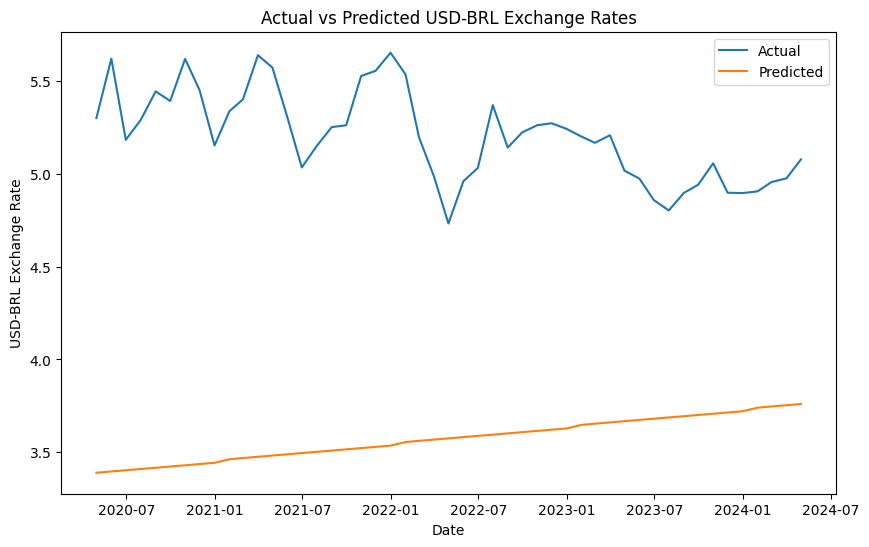

In [29]:
# !pip install pandas matplotlib yfinance scikit-learn

# Passo 3: Importar demais bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Passo 4: Adquirindo dados históricos de cambio do site Yahoo Finance
start_date = '2000-01-01'
end_date = '2024-04-30'
data = yf.download('USDBRL=X', start=start_date, end=end_date)

# Step 4: Preprocess the data
data = data['Close'].resample('M').mean().ffill()

# Step 5: Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Step 6: Train a machine learning model
X_train = pd.DataFrame(index=train_data.index)
X_train['month'] = train_data.index.month
X_train['year'] = train_data.index.year
y_train = train_data.values

model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Make predictions for the test set
X_test = pd.DataFrame(index=test_data.index)
X_test['month'] = test_data.index.month
X_test['year'] = test_data.index.year
y_test = test_data.values
predictions = model.predict(X_test)

# Step 8: Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, y_test, label='Actual')
plt.plot(test_data.index, predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('USD-BRL Exchange Rate')
plt.title('Actual vs Predicted USD-BRL Exchange Rates')
plt.legend()
plt.show()
